<a href="https://colab.research.google.com/github/Massato01/ProjetoCalculoNumericoRegressaoLinear/blob/main/ProjetoCalculoNumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [170]:
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns
import plotly.express        as px
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score
from ipywidgets              import widgets, HBox, VBox
from IPython.display         import display

# **Importação e tratamento dos dados**

In [152]:
df_wine = pd.read_csv('/content/winequality-red.csv')
df_wine.shape

(1599, 12)

## Verificando as colunas presentes

In [153]:
[i for i in df_wine.columns]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

## Verificando o tipo dos dados

In [154]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Verificando NaN

In [155]:
df_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# **Análises preliminares**

In [156]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Estatística descritiva

In [157]:
df_wine.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


## Mapa de correlação

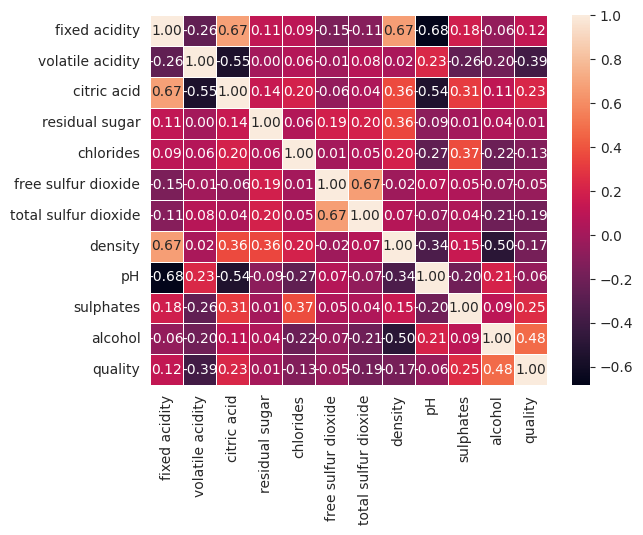

In [158]:
corr = df_wine.corr().round(4)
ax = sns.heatmap(corr, annot = True, fmt=".2f", linewidths=.6)

> ### Correlações fortes (exemplos):
> * fixed acidity & citric acid
> * fixed acidity & density
> * free sulfur dioxide & total sulfur dioxide

**Obs: Class possui forte correlação com todas as colunas**

# **Análises gráficas**

In [159]:
sns.set_palette("Set2")
sns.set_style("darkgrid")

## Visualizando o comportamento entre as colunas

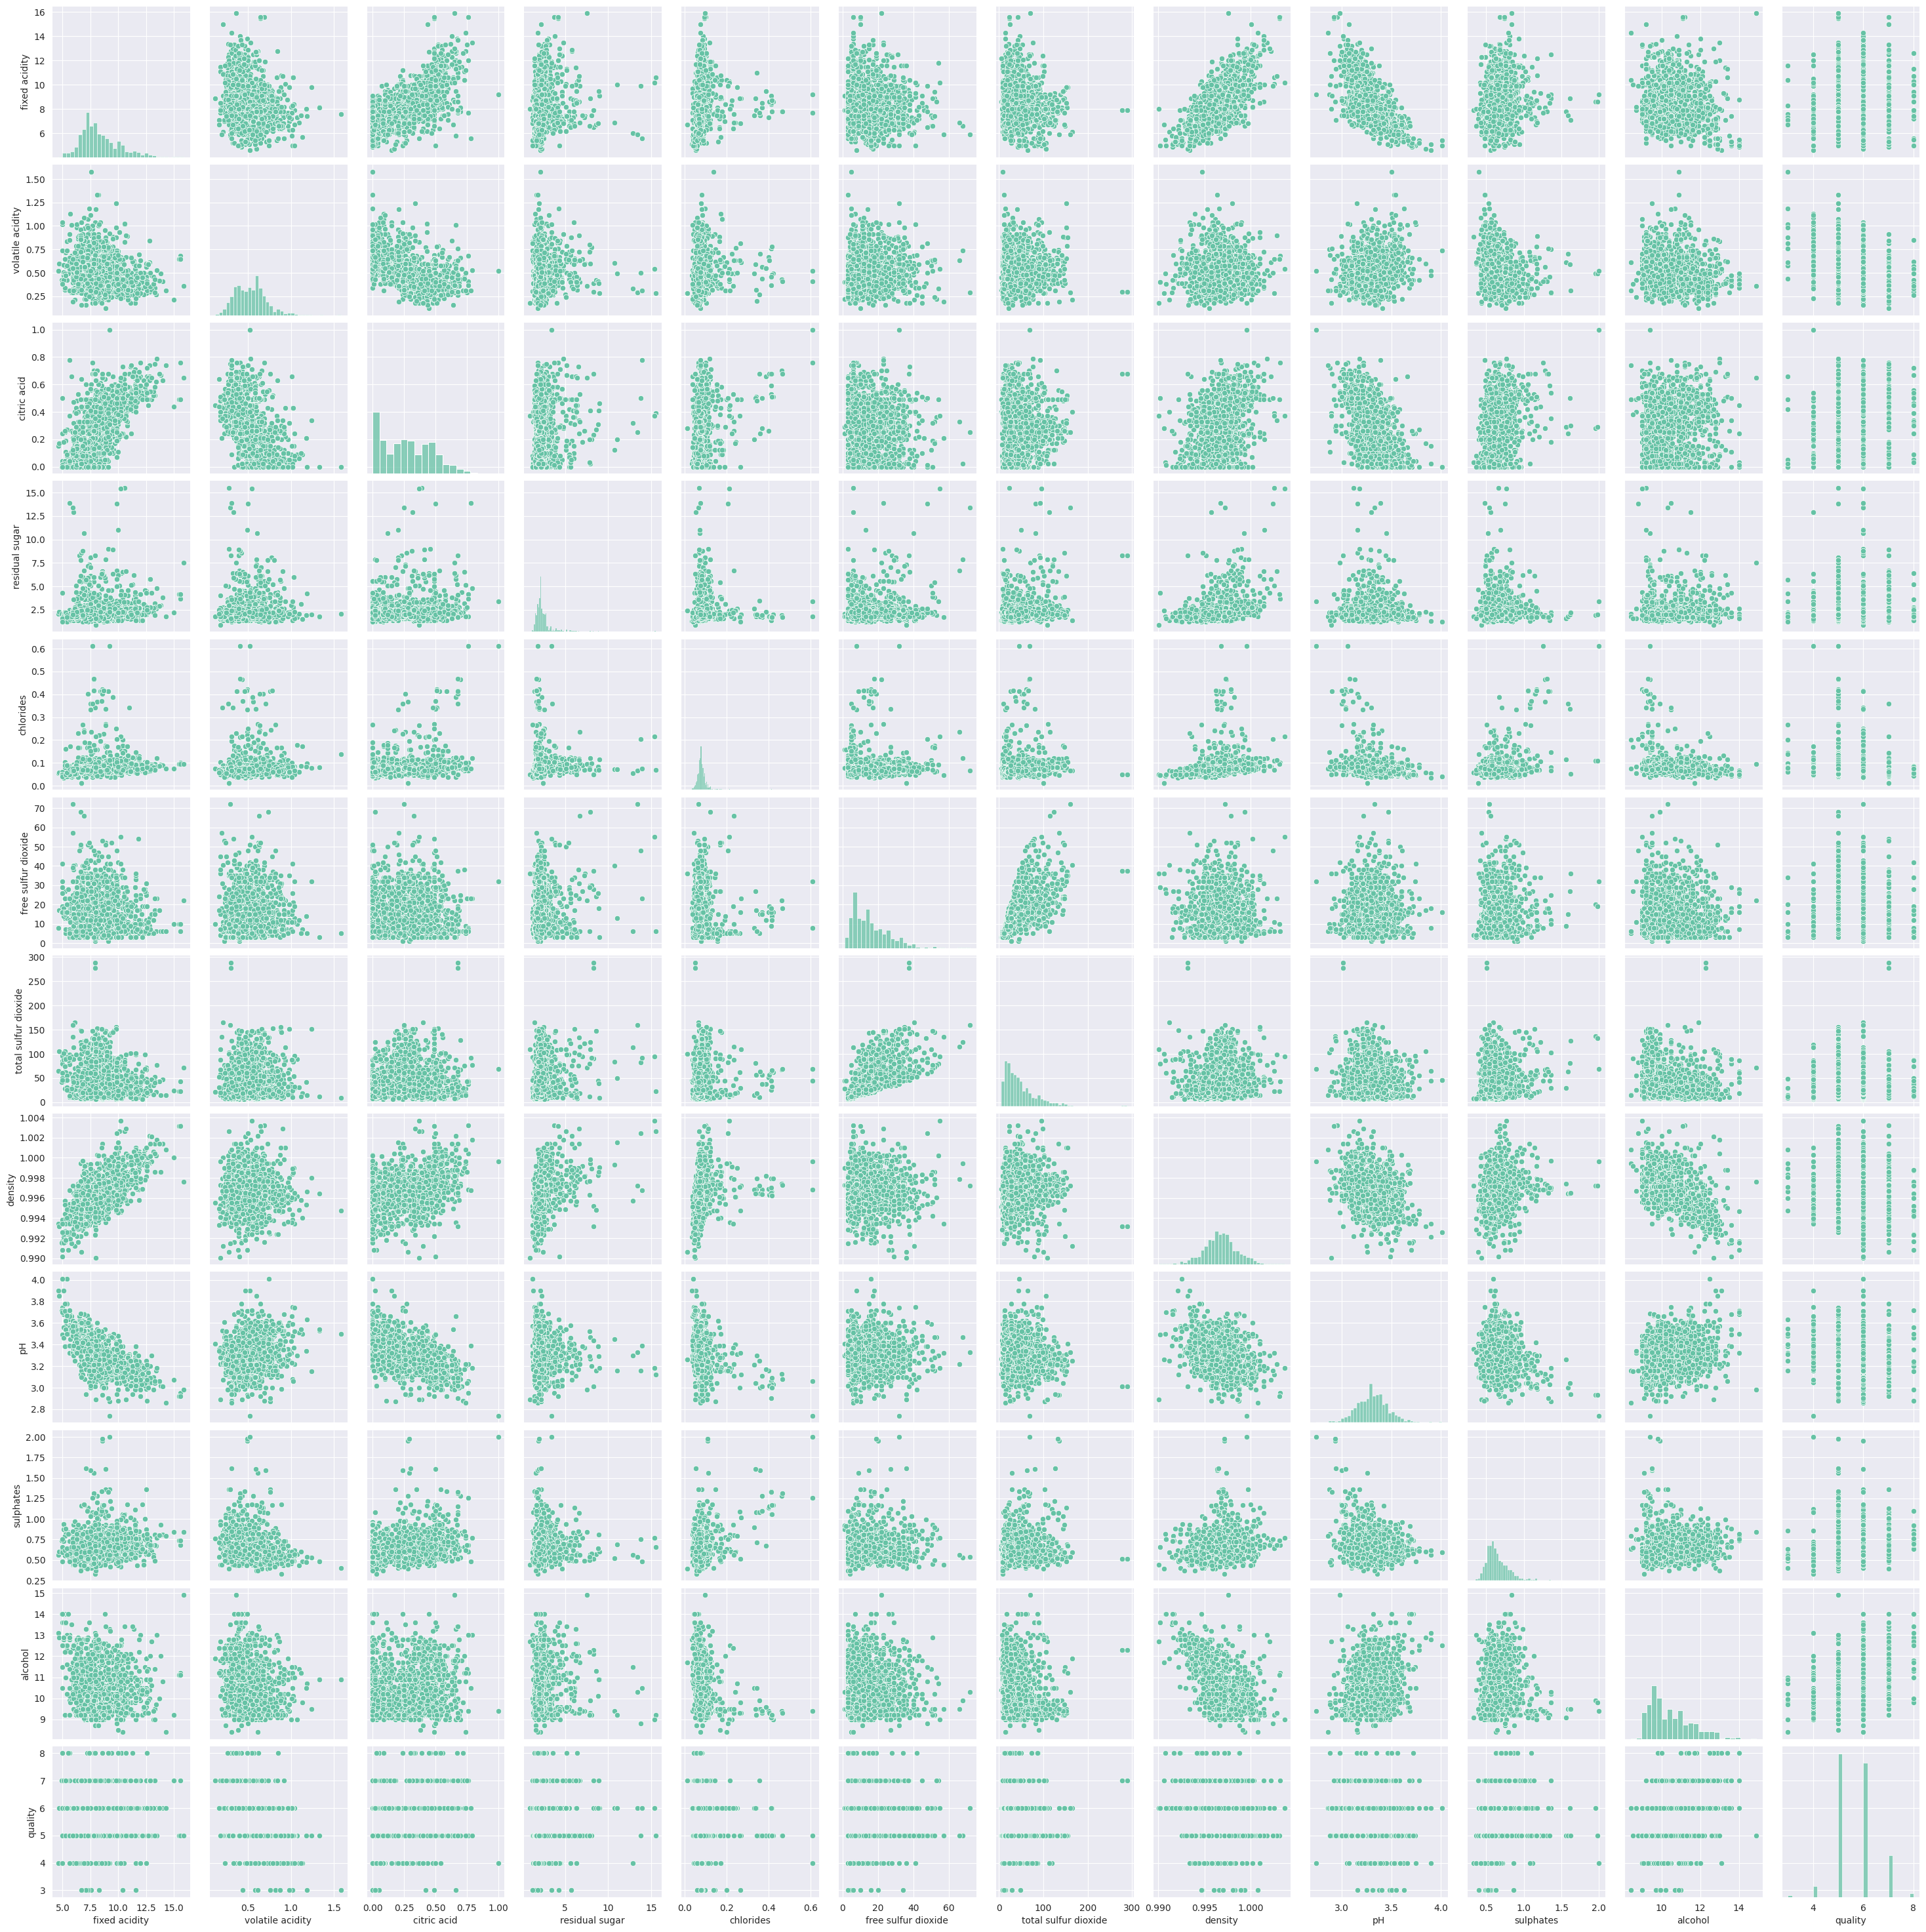

In [160]:
ax = sns.pairplot(df_wine)

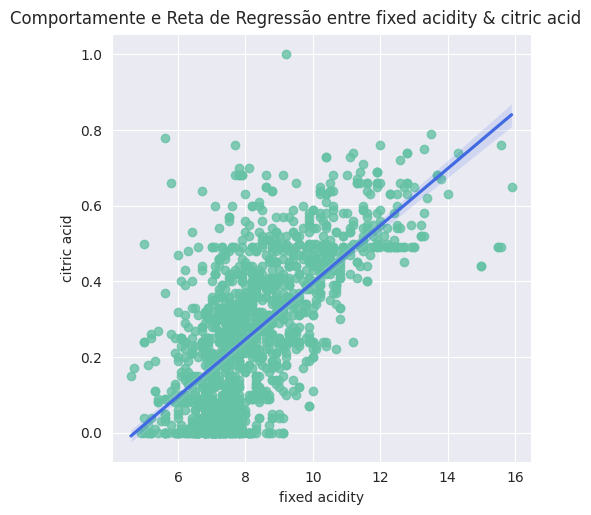

In [187]:
ax = sns.lmplot(x = 'fixed acidity', y = 'citric acid', data = df_wine,
                line_kws={'color': 'royalblue'});
ax.fig.suptitle('Comportamente e Reta de Regressão entre fixed acidity & citric acid',
                y = 1.02);

# **Regrassão Linear Simples**

# Passo a passo

> # Citric Acid & Fixed Acidity

## Variáveis Dependente e Indepentente

In [188]:
# Variável dependente
y = df_wine['citric acid'].values

# Variável independente
X = df_wine['fixed acidity'].values
X = X.reshape(-1, 1)

In [163]:
# print(f'{y = }\n{X = }')

## Separando dados de treino e teste

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480


## Criando o modelo

In [190]:
modelo = LinearRegression()

In [191]:
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de Determinação (R²)

In [192]:
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

R² = 0.42


### Coeficiente de Correlação

In [193]:
dict_size_shape = pd.DataFrame({
    df_wine.columns[2] : df_wine['fixed acidity'],
    df_wine.columns[3] : df_wine['citric acid'],
})

dict_size_shape_corr = dict_size_shape.corr()
print(f'Coeficiente de Correlação: {dict_size_shape_corr.iloc[0, 1].round(2)}')

Coeficiente de Correlação: 0.67


## Gráfico da Regressão Linear

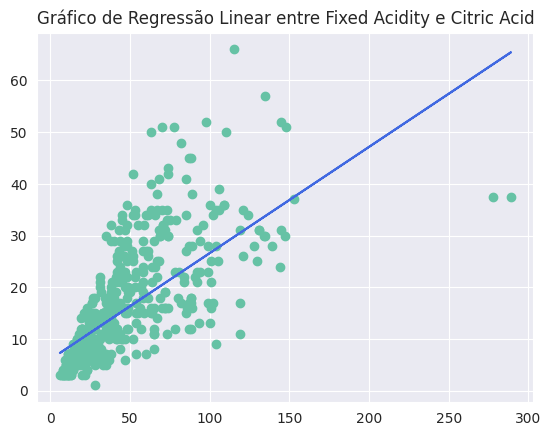

In [209]:
plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e Citric Acid')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')

# Resumido

> # Fixed Acidity & Density

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.43
Coeficiente de Correlação: 0.67]



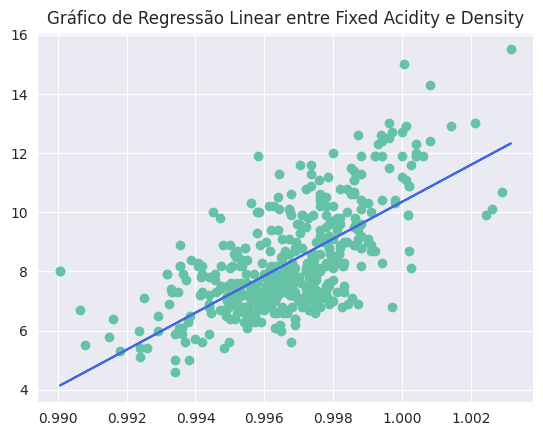

In [205]:
# Variável dependente
y = df_wine['fixed acidity'].values

# Variável independente
X = df_wine['density'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Correlação
dict_size_shape = pd.DataFrame({
    df_wine.columns[2] : df_wine['fixed acidity'],
    df_wine.columns[3] : df_wine['density'],
})

dict_size_shape_corr = dict_size_shape.corr()
print(f'Coeficiente de Correlação: {dict_size_shape_corr.iloc[0, 1].round(2)}]\n')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e Density')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')

> # Free Sulfur Dioxide & Total Sulfur Dioxide

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.48
Coeficiente de Correlação: 0.67]



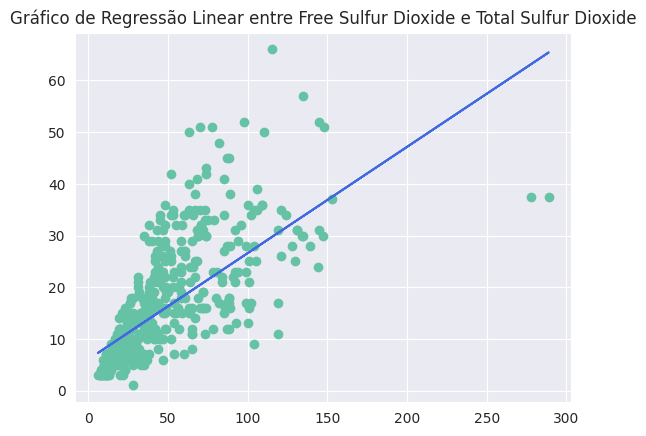

In [208]:
# Variável dependente
y = df_wine['free sulfur dioxide'].values

# Variável independente
X = df_wine['total sulfur dioxide'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Correlação
dict_size_shape = pd.DataFrame({
    df_wine.columns[2] : df_wine['free sulfur dioxide'],
    df_wine.columns[3] : df_wine['total sulfur dioxide'],
})

dict_size_shape_corr = dict_size_shape.corr()
print(f'Coeficiente de Correlação: {dict_size_shape_corr.iloc[0, 1].round(2)}]\n')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Free Sulfur Dioxide e Total Sulfur Dioxide')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')

> # Fixed Acidity & pH

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.51
Coeficiente de Correlação: -0.68]



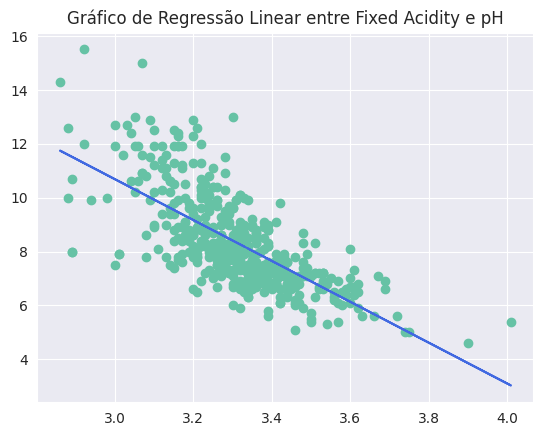

In [210]:
# Variável dependente
y = df_wine['fixed acidity'].values

# Variável independente
X = df_wine['pH'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Correlação
dict_size_shape = pd.DataFrame({
    df_wine.columns[2] : df_wine['fixed acidity'],
    df_wine.columns[3] : df_wine['pH'],
})

dict_size_shape_corr = dict_size_shape.corr()
print(f'Coeficiente de Correlação: {dict_size_shape_corr.iloc[0, 1].round(2)}]\n')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Fixed Acidity e pH')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')

> # Citric Acid & Volatile Acidity

Tamanho dos dados de treino e de teste:
len(X_train) = 1119
len(y_train) = 1119

len(X_test) = 480
len(y_test) = 480

R² = 0.34
Coeficiente de Correlação: -0.55]



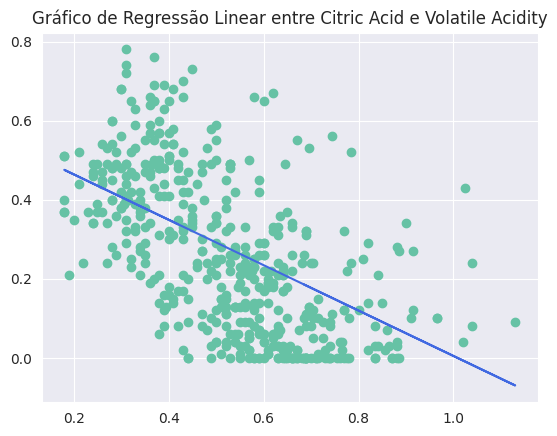

In [211]:
# Variável dependente
y = df_wine['citric acid'].values

# Variável independente
X = df_wine['volatile acidity'].values
X = X.reshape(-1, 1)

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'Tamanho dos dados de treino e de teste:\n{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }\n')

# Criando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficiente de Determinação
print(f'R² = {modelo.score(X_test, y_test).round(2)}')

# Coeficiente de Correlação
dict_size_shape = pd.DataFrame({
    df_wine.columns[2] : df_wine['citric acid'],
    df_wine.columns[3] : df_wine['volatile acidity'],
})

dict_size_shape_corr = dict_size_shape.corr()
print(f'Coeficiente de Correlação: {dict_size_shape_corr.iloc[0, 1].round(2)}]\n')

plt.scatter(X_test, y_test)
plt.title('Gráfico de Regressão Linear entre Citric Acid e Volatile Acidity')
plt.plot(X_test, modelo.predict(X_test), color = 'royalblue')

# **Regressão Linear Múltipla**